In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('ggplot')
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
import matplotlib.style as style

from sklearn.metrics import precision_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import textwrap # for wrapping answer descriptions
# from individual_soln import * # use functions from individual_soln.py

In [110]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/Users/henryhoenig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [111]:
df = pd.read_stata('data/anes_timeseries_2020_stata_20210324.dta')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 0 to 8279
Columns: 1381 entries, version to V202635
dtypes: category(1346), float64(34), object(1)
memory usage: 13.5+ MB


### Cleaning Data

In [113]:
### Consolidating voted_for category

# V200001: respondent case ID
# V202073: post-election, who respondent voted for
# V201029: pre-election, who respondent voted for if voted early
# V201033: pre-election, who respondent intended to vote for 

df.iloc[:][['V200001', 'V202073', 'V201029', 'V201033']]

V200001  \
0     200015.0   
1     200022.0   
2     200039.0   
3     200046.0   
4     200053.0   
5     200060.0   
6     200084.0   
7     200091.0   
8     200107.0   
9     200114.0   
10    200121.0   
11    200138.0   
12    200152.0   
13    200169.0   
14    200176.0   
15    200183.0   
16    200190.0   
17    200206.0   
18    200220.0   
19    200244.0   
20    200268.0   
21    200275.0   
22    200282.0   
23    200305.0   
24    200312.0   
25    200329.0   
26    200343.0   
27    200374.0   
28    200381.0   
29    200404.0   
30    200411.0   
31    200435.0   
32    200442.0   
33    200459.0   
34    200466.0   
35    200473.0   
36    200480.0   
37    200497.0   
38    200503.0   
39    200510.0   
40    200527.0   
41    200534.0   
42    200541.0   
43    200558.0   
44    200565.0   
45    200589.0   
46    200596.0   
47    200602.0   
48    200626.0   
49    200633.0   
50    200640.0   
51    200671.0   
52    200688.0   
53    200695.0   
54    200701.0   
55    200718.0   
56    200725.0   
57    200732.0   
58    200749.0   
59    200756.0   
60    200763.0   
61    200770.0   
62    200787.0   
63    200794.0   
64    200800.0   
65    200817.0   
66    200824.0   
67    200831.0   
68    200855.0   
69    200862.0   
70    200879.0   
71    200886.0   
72    200893.0   
73    200909.0   
74    200916.0   
75    200947.0   
76    200954.0   
77    200985.0   
78    201001.0   
79    201025.0   
80    201032.0   
81    201063.0   
82    201070.0   
83    201087.0   
84    201094.0   
85    201100.0   
86    201117.0   
87    201124.0   
88    201131.0   
89    201155.0   
90    201179.0   
91    201186.0   
92    201193.0   
93    201209.0   
94    201216.0   
95    201223.0   
96    201230.0   
97    201247.0   
98    201254.0   
99    201261.0   
100   201278.0   
101   201285.0   
102   201292.0   
103   201322.0   
104   201339.0   
105   201346.0   
106   201353.0   
107   201360.0   
108   201377.0   
109   201384.0   
110   201391.0   
111   201407.0   
112   201421.0   
113   201438.0   
114   201445.0   
115   201469.0   
116   201476.0   
117   201506.0   
118   201513.0   
119   201520.0   
120   201537.0   
121   201544.0   
122   201551.0   
123   201568.0   
124   201575.0   
125   201599.0   
126   201605.0   
127   201629.0   
128   201636.0   
129   201650.0   
130   201674.0   
131   201681.0   
132   201711.0   
133   201728.0   
134   201759.0   
135   201766.0   
136   201773.0   
137   201780.0   
138   201797.0   
139   201803.0   
140   201810.0   
141   201827.0   
142   201834.0   
143   201841.0   
144   201858.0   
145   201865.0   
146   201872.0   
147   201889.0   
148   201896.0   
149   201902.0   
150   201919.0   
151   201926.0   
152   201971.0   
153   201988.0   
154   201995.0   
155   202004.0   
156   202011.0   
157   202042.0   
158   202097.0   
159   202103.0   
160   202127.0   
161   202141.0   
162   202172.0   
163   202189.0   
164   202196.0   
165   202202.0   
166   202257.0   
167   202271.0   
168   202288.0   
169   202301.0   
170   202318.0   
171   202325.0   
172   202332.0   
173   202356.0   
174   202363.0   
175   202370.0   
176   202387.0   
177   202400.0   
178   202417.0   
179   202431.0   
180   202455.0   
181   202462.0   
182   202479.0   
183   202486.0   
184   202493.0   
185   202509.0   
186   202516.0   
187   202523.0   
188   202530.0   
189   202547.0   
190   202578.0   
191   202585.0   
192   202592.0   
193   202608.0   
194   202615.0   
195   202622.0   
196   202639.0   
197   202646.0   
198   202653.0   
199   202660.0   
200   202677.0   
201   202691.0   
202   202707.0   
203   202714.0   
204   202721.0   
205   202738.0   
206   202745.0   
207   202752.0   
208   202769.0   
209   202783.0   
210   202790.0   
211   202806.0   
212   202813.0   
213   202820.0   
214   202837.0   
215   202875.0   
216   202882.0   
217   202899.0   
218   202905.0   
219   202929.0   
220   202936.0   
221   20294

In [114]:
# creates new column voted_for with numerical values or NaN (from post-election)
df['voted_for'] = df['V202073'].map({'1. Joe Biden': 0, '2. Donald Trump': 1})

In [115]:
# creates a second new column with numerical values or NaN (from pre-election, early voting)
df['voted_for_2'] = df['V201029'].map({'1. Joe Biden': 0, '2. Donald Trump': 1})

In [116]:
# creates a function to take value from first col if numerical, or second if first is NaN
take_float = lambda s1, s2: s1 if s1 in [0, 1] else s2 #if s2 in [1.0, 2.0, 3.0, 4.0]

In [117]:
# combines two columns with voting preferences into voted_for
df['voted_for'].combine(df['voted_for_2'], take_float)

0      NaN 
1      NaN 
2       0.0
3       0.0
4       1.0
5       0.0
6       1.0
7      NaN 
8       0.0
9       0.0
10      0.0
11      0.0
12      1.0
13      0.0
14     NaN 
15     NaN 
16      0.0
17      0.0
18      0.0
19      0.0
20     NaN 
21      0.0
22      0.0
23     NaN 
24     NaN 
25      0.0
26      1.0
27      1.0
28      0.0
29      0.0
30     NaN 
31     NaN 
32      0.0
33      1.0
34      0.0
35      1.0
36      0.0
37      0.0
38      0.0
39      1.0
40      1.0
41      0.0
42      1.0
43      1.0
44      1.0
45      1.0
46      0.0
47      0.0
48      1.0
49      0.0
50      0.0
51      0.0
52     NaN 
53     NaN 
54     NaN 
55     NaN 
56      0.0
57      0.0
58      0.0
59      1.0
60      0.0
61     NaN 
62      0.0
63      0.0
64      0.0
65      0.0
66      0.0
67      1.0
68      0.0
69      0.0
70      0.0
71      0.0
72      0.0
73      0.0
74      1.0
75     NaN 
76     NaN 
77      0.0
78      1.0
79      0.0
80      1.0
81      1.0
82      0.0
83  

In [118]:
# drops all rows in which no votes were recorded
df = df.loc[df.voted_for.notnull()]
df['voted_for'].isnull().sum()

0

In [119]:
df['voted_for'] = df['voted_for'].astype(int)

In [120]:
# drops other columns on presidential vote, party preference
df.drop(columns=['voted_for_2', 'V200001', 'V202073', 'V201029', 'V201033', 'V202105x', 'V202106x', 'V202107x', 'V202108x'], inplace=True)

In [121]:
# drops other extraneous columns from beginning
df.drop(columns=['version', 'V160001_orig', 'V200002', 'V200003', 'V200004', 'V200005'], inplace=True)

In [122]:
# drops unneeded columns (were all floats: internal ANES data)
floats_to_drop = []
for col in df.columns[:]:
    if df[col].dtype == 'float':
        floats_to_drop.append(col)
floats_to_drop = floats_to_drop[:-1]
df.drop(columns=floats_to_drop, inplace=True)

In [123]:
# drops more cols directly related to feelings for candidates, parties, votes in downballot races
df.drop(columns=['V202436', 'V202144', 'V202073z', 'V201382x', 'V201381', 'V201380', 'V201254', 'V201217', 'V201213', 'V201214', 'V201213', 'V201212', 'V201203', 'V201152', 'V201147x', 'V201145', 'V201145', 'V201144x', 'V201143', 'V201142', 'V201140', 'V201139', 'V201138x', 'V201137', 'V201136', 'V201134', 'V201133', 'V201130', 'V201131', 'V201128', 'V201127', 'V201110', 'V201103', 'V201036z', 'V201036', 'V201033z', 'V201029z', 'V201021', 'V202435', 'V202143', 'V202110x', 'V202077z', 'V202077', 'V202073z', 'V201217', 'V201209', 'V201210', 'V201151', 'V201208', 'V201202', 'V201107', 'V201108', 'V201106', 'V202435', 'V202433', 'V202434', 'V202436', 'V202437', 'V202438', 'V202439', 'V202443', 'V202444', 'V201021', 'V201029z', 'V201033z', 'V201036', 'V201036z'], inplace=True)

In [124]:
df.drop(columns=['V201075x', 'V201076x', 'V201077x', 'V201078x', 'V201129x', 'V201132x', 'V201135x', 'V201141x', 'V201211', 'V201215', 'V201384', 'V201387', 'V201386x', 'V202429', 'V202206', 'V201389x'], inplace=True)

In [125]:
df.drop(columns=['V201226', 'V202427', 'V201112', 'V201228', 'V201391', 'V201383', 'V201219', 'V202111x', 'V202081', 'V202208', 'V202208', 'V201241', 'V201114', 'V201244', 'V201239', 'V202112x', 'V202088', 'V201243', 'V201240', 'V201230', 'V201428', 'V201231x', 'V201392x', 'V202210', 'V201158', 'V201242', 'V202210', 'V201260', 'V202492', 'V201105', 'V201052'], inplace=True)

In [126]:
df.drop(columns=['V202100', 'V202218', 'V201070', 'V202064', 'V201055', 'V201045', 'V201061', 'V201647', 'V201064', 'V201073', 'V202006', 'V201042', 'V201018', 'V202113x', 'V202094'], inplace=True)

### Prepping Data: 

In [127]:
# drops all columns with more than 15 categorical values or only one

df2 = df.copy()
for col in df.columns:
    #print(col, df[col].nunique())
    if df[col].nunique()==1 or df[col].nunique() > 15:
        df2.drop(col, axis=1, inplace=True)

In [128]:
# assigns target value to y (need to convert rest of cols to string)
y = df2.pop('voted_for')

In [129]:
# converts rest of df2 to string
df3 = df2.astype(str)

In [130]:
# does one hot encoding on reduced dataframe df3, with all strings
encoder = OneHotEncoder()
encoded_df3 = encoder.fit_transform(df3)

In [131]:
encoded_df3.todense()

matrix([[1., 0., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 1., 0.],
        ...,
        [1., 0., 1., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 0., 1., 0.]])

In [132]:
X = encoded_df3

### The Model: GradientBoostingClassifier (first run)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

In [134]:
# somewhat random choice of hyperparameters for first run
clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=1000, random_state=7, max_depth=4)

In [135]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=1000, random_state=7)

In [136]:
print("Train accuracy: %0.3f" % clf.score(X_train, y_train))
print("Test accuracy: %0.3f" % clf.score(X_test, y_test))

Train accuracy: 1.000
Test accuracy: 0.956


In [137]:
kfold=5
cross_val_results = cross_val_score(clf, X_test, y_test, cv=kfold, scoring='accuracy')

In [138]:
cross_val_results.mean()

0.9488372093023256

In [140]:
predictions = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[953  41]
 [ 34 692]]


<IPython.core.display.Javascript object>


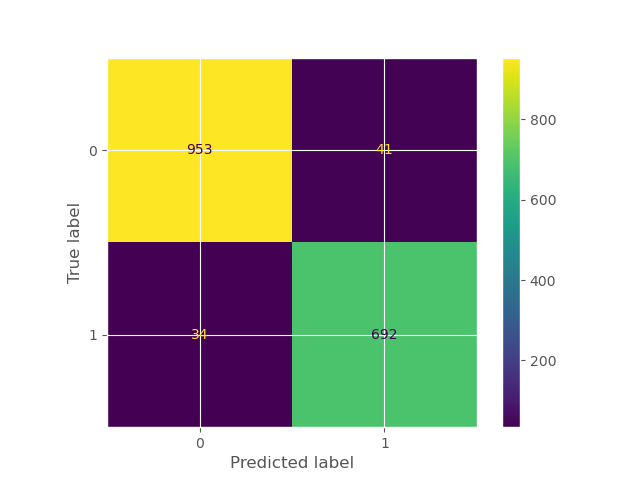

In [141]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()
plt.savefig('/Users/henryhoenig/Galvanize/capstones/capstone_two/first_conf_matrix.png', bbox_inches='tight')

### Grid search

In [60]:
# def display_default_and_gsearch_model_results(model_default, model_gridsearch, 
#                                               X_test, y_test):
#     '''
#         Parameters: model_default: fit model using initial parameters
#                     model_gridsearch: fit model using parameters from gridsearch
#                     X_test: 2d numpy array
#                     y_test: 1d numpy array
#         Return: None, but prints out mse and r2 for the default and model with
#                 gridsearched parameters
#     '''
#     name = model_default.__class__.__name__.replace('Regressor', '') # for printing
#     y_test_pred = model_gridsearch.predict(X_test)
#     mse = mean_squared_error(y_test, y_test_pred)
#     r2 = r2_score(y_test, y_test_pred)
#     print("Results for {0}".format(name))
#     print("Gridsearched model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))
#     y_test_pred = model_default.predict(X_test)
#     mse = mean_squared_error(y_test, y_test_pred)
#     r2 = r2_score(y_test, y_test_pred)
#     print("     Default model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))


In [61]:
# def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
#     '''
#         Parameters: estimator: the type of model (e.g. RandomForestRegressor())
#                     paramter_grid: dictionary defining the gridsearch parameters
#                     X_train: 2d numpy array
#                     y_train: 1d numpy array

#         Returns:  best parameters and model fit with those parameters
#     '''
#     model_gridsearch = GridSearchCV(estimator,
#                                     parameter_grid,
#                                     n_jobs=-1,
#                                     verbose=True,
#                                     scoring='neg_mean_squared_error')
#     model_gridsearch.fit(X_train, y_train)
#     best_params = model_gridsearch.best_params_ 
#     model_best = model_gridsearch.best_estimator_
#     print("\nResult of gridsearch:")
#     print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
#     print("-" * 55)
#     for param, vals in parameter_grid.items():
#         print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
#                                                 str(best_params[param]),
#                                                 str(vals)))
#     return best_params, model_best

In [62]:
# gradient_boosting_grid = {'learning_rate': [0.01, 0.005],
#                           'max_depth': [2,4],
#                           'min_samples_leaf': [1, 2, 5],
#                           'max_features': [1.0, 0.3, 0.1],
#                           'n_estimators': [3000, 5000]}

# best_params, best_model = gridsearch_with_output(GradientBoostingClassifier(), 
#                                                            gradient_boosting_grid, 
#                                                            X_train, y_train)

# print("\nComparing model with gridsearch params to initial model on Test set.")
# clf.fit(X_train, y_train)
# display_default_and_gsearch_model_results(clf, best_model, X_test, y_test)

### Optimized model

#### Testing optimized model after grid searchs
* Not too worried about optimizing since accuracy is already high, and focused on interpretation

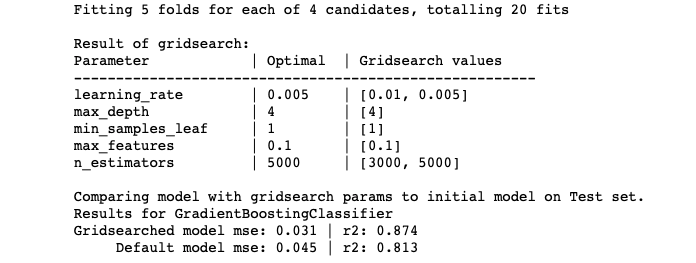

In [142]:
clf = GradientBoostingClassifier(learning_rate=0.005, n_estimators=5000, random_state=7, max_depth=4, min_samples_leaf=1, max_features=0.1)

In [143]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.005, max_depth=4, max_features=0.1,
                           n_estimators=5000, random_state=7)

In [144]:
print("Train accuracy: %0.3f" % clf.score(X_train, y_train))
print("Test accuracy: %0.3f" % clf.score(X_test, y_test))

Train accuracy: 1.000
Test accuracy: 0.957


In [145]:
kfold=5
cross_val_results = cross_val_score(clf, X_test, y_test, cv=kfold, scoring='accuracy')

In [146]:
cross_val_results.mean()

0.9511627906976745

In [147]:
predictions = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[956  38]
 [ 36 690]]


<IPython.core.display.Javascript object>


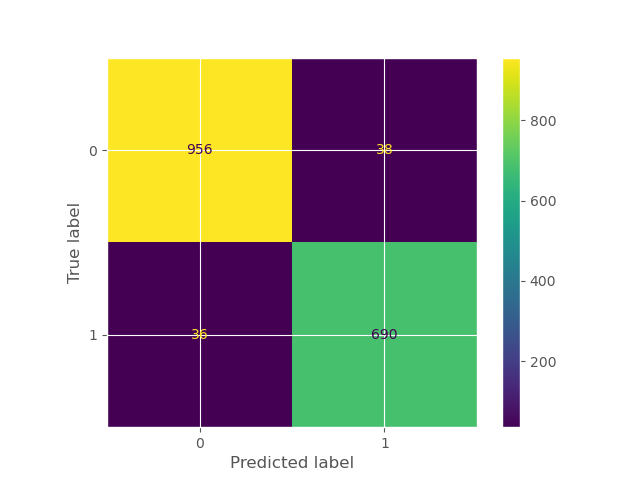

In [148]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()
plt.savefig('/Users/henryhoenig/Galvanize/capstones/capstone_two/second_conf_matrix.png', bbox_inches='tight')

### Plotting Feature Importances

In [ ]:
feature_importances2 = pd.DataFrame((clf.feature_importances_), index=encoder.get_feature_names(df3.columns), columns=['importance']).sort_values('importance', ascending=False)

In [178]:
feature_importances3 = feature_importances2
feature_importances3 = feature_importances3['importance'].tolist()
feature_importances3 = feature_importances3[0:10]
feature_importances3

[0.09797332678773563,
 0.09537774720298217,
 0.08133223460046986,
 0.0657803115310977,
 0.05330832986295198,
 0.05314794593618128,
 0.045245619515432316,
 0.038015264353091584,
 0.033049716563707324,
 0.023218168340026227]

<IPython.core.display.Javascript object>


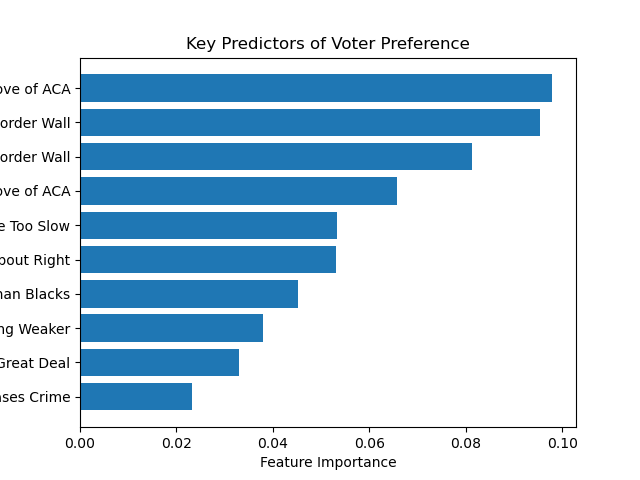

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
# np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

feature_names = ['Approve of ACA',
 'Favor Border Wall',
 'Oppose Border Wall',
 'Disapprove of ACA',
 'Govt Covid Response Too Slow',
 'Govt Covid Response About Right',
 'Police Treat Whites Much Better Than Blacks',
 'U.S. Global Standing Weaker',
 'Approve of ACA a Great Deal',
 'Illegal Immigration Increases Crime']

y_pos = np.arange(len(feature_names))
#performance = 3 + 10 * np.random.rand(len(feature_names))

ax.barh(y_pos, feature_importances3, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_title('Key Predictors of Voter Preference')
#plt.savefig('/Users/henryhoenig/Galvanize/capstones/capstone_two/features_full_data.png', bbox_inches='tight')
plt.show()

### Plotting Permutation Feature Importance

In [199]:
X_train2 = X_train.todense()

In [200]:
result = permutation_importance(clf, X_train2, y_train, n_repeats=10, random_state=0)

In [201]:
result

{'importances_mean': array([0., 0., 0., ..., 0., 0., 0.]),
 'importances_std': array([0., 0., 0., ..., 0., 0., 0.]),
 'importances': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

In [235]:
perm_sorted_idx = result.importances_mean.argsort()[-1:-11:-1]

labels=encoder.get_feature_names(df3.columns)[perm_sorted_idx]

In [236]:
result['importances'].max()

0.0004983802641415069

In [237]:
perm_sorted_idx

array([ 424, 2442, 4193,  745, 4841, 1617, 1612, 1613, 1614, 1615])

In [238]:
result.importances_mean

array([0., 0., 0., ..., 0., 0., 0.])

In [239]:
labels

array(['V201250_5.0', 'V202074_-9. Refused', 'V202474c_1. Mentioned',
       'V201340_1. Pleased',
       'V202635_-5. Interview breakoff (sufficient partial IW)',
       'V201593_1. Extremely likely', 'V201592_-9. Refused',
       'V201592_1. Someone has put off health care',
       'V201592_2. No one has put off health care',
       "V201593_-8. Don't know"], dtype=object)

In [240]:
perm_features = result.importances_mean[perm_sorted_idx].tolist()

In [241]:
perm_features

[0.00037378519810615796,
 0.0002990281584849486,
 0.000249190132070809,
 0.0001993521056566472,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<IPython.core.display.Javascript object>


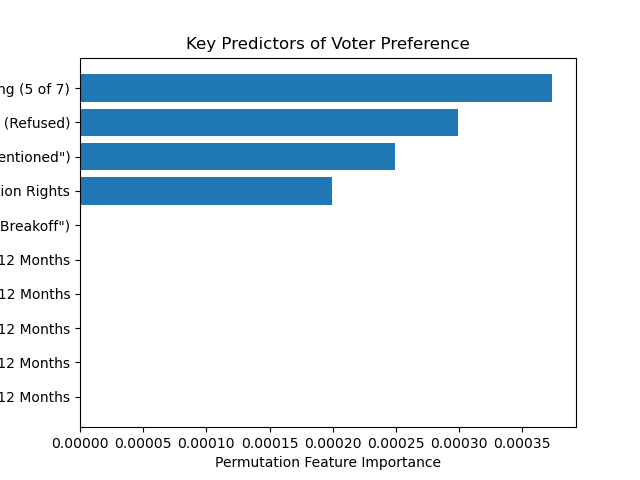

In [208]:
plt.rcdefaults()
fig, ax = plt.subplots()

perm_feature_names = ['View of Biden on Defense Spending (5 of 7)', 'Strength of Preference for Candidate (Refused)', 'Relationship to Transgender Person ("Mentioned")', 'Would Be Pleased if SCOTUS Reduced Abortion Rights', 'Confidence in Scientific Community ("Interview Breakoff")', 'Extremely Likely Able to Pay All Medical Costs in Next 12 Months', 'Refused to Say if Delayed Checkup or Vaccine in Past 12 Months', 'Someone in Household Has Delayed Checkup or Vaccine Past 12 Months', 'No One Has Delayed Checkup or Vaccine Past 12 Months', 'Do Not Know if Able to Pay Health Care Costs Next 12 Months']

y_pos = np.arange(len(perm_feature_names))
#performance = 3 + 10 * np.random.rand(len(feature_names))

ax.barh(y_pos, perm_features, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(perm_feature_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Permutation Feature Importance')
ax.set_title('Key Predictors of Voter Preference')
#plt.savefig('/Users/henryhoenig/Galvanize/capstones/capstone_two/perm_features_full_data.png', bbox_inches='tight')
plt.show()